<a href="https://colab.research.google.com/github/chrishg23-jpg/HES-benchmark/blob/main/EmergentRegulator003.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

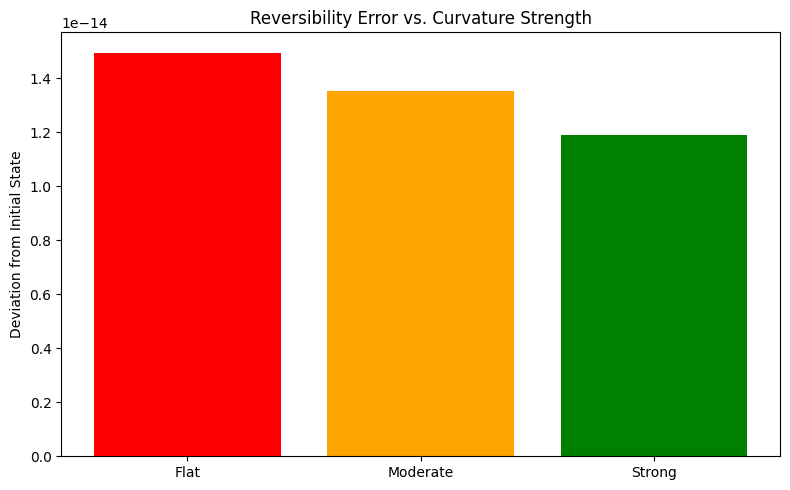

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 100
T = 50
x = np.linspace(0, 1, N)
v0 = np.sin(2 * np.pi * x)

# Curvature field
def curvature_field(strength=0.0):
    return strength * np.exp(-((x - 0.5)**2) / 0.01)

# Forward evolution
def evolve_forward(v_init, curvature, steps):
    traj = [v_init.copy()]
    v = v_init.copy()
    noises = []
    for _ in range(steps):
        noise = np.random.randn(N) * (1.0 / (1.0 + curvature))
        v += noise
        traj.append(v.copy())
        noises.append(noise)
    return np.array(traj), noises

# Reverse evolution
def evolve_reverse(v_final, curvature, noises):
    traj = [v_final.copy()]
    v = v_final.copy()
    for noise in reversed(noises):
        v -= noise  # Reverse the noise
        traj.append(v.copy())
    return np.array(traj)

# Deviation metric
def deviation(v_recovered, v_original):
    return np.linalg.norm(v_recovered - v_original)

# Run and compare
curvatures = [0.0, 2.0, 5.0]
labels = ["Flat", "Moderate", "Strong"]
colors = ["red", "orange", "green"]
deviations = []

for strength in curvatures:
    C = curvature_field(strength)
    forward_traj, noises = evolve_forward(v0, C, T)
    reverse_traj = evolve_reverse(forward_traj[-1], C, noises)
    dev = deviation(reverse_traj[-1], v0)
    deviations.append(dev)

# Plot
plt.figure(figsize=(8, 5))
plt.bar(labels, deviations, color=colors)
plt.title("Reversibility Error vs. Curvature Strength")
plt.ylabel("Deviation from Initial State")
plt.tight_layout()
plt.show()
